In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Training/0/Training_17389803.jpg")

In [3]:
img_array.shape #rgb

(48, 48, 3)

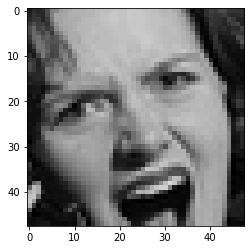

In [4]:
plt.imshow(img_array) ## BGR

In [5]:
Datadirectory="Training/" ## training dataset

In [6]:
Classes=["0","1","2","3","4","5","6"]  ##list of classes folders name

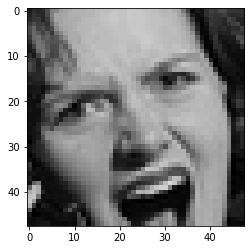

In [7]:
for category in Classes: ##as import os so all paths given and all images will be read
    path=os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        ##backtorgb=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

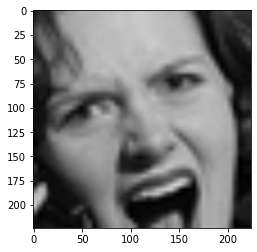

In [8]:
img_size=224 ## resize images as .ImageNet=>224 x 224
new_array= cv2.resize(img_array,(img_size,img_size)) 
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
## reading all images and convert to array and store in below array
training_Data = [] ## data array

def create_training_Data():
    for category in Classes:
        path = os. path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array= cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
create_training_Data()

In [12]:
print(len(training_Data)) ##images read count

9701


In [13]:
temp = np.array(training_Data)

C:\Users\HP\AppData\Local\Temp/ipykernel_18112/2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [14]:
temp.shape

(9701, 2)

In [15]:
import random ##Deep learning model  not know sequence so that it 
               ## is dynamic, robust

random.shuffle(training_Data)

In [16]:
X = [] ## data/feature
Y = [] ## Label

for features,label in training_Data:
    X.append(features)
    Y.append(label)

X= np.array(X).reshape(-1,img_size,img_size,3) ##converting into 4 dimensions (mobilenet takes 4)

In [17]:
X.shape

(9701, 224, 224, 3)

In [18]:
X

array([[[[124, 124, 124],
         [124, 124, 124],
         [122, 122, 122],
         ...,
         [194, 194, 194],
         [196, 196, 196],
         [196, 196, 196]],

        [[124, 124, 124],
         [124, 124, 124],
         [123, 123, 123],
         ...,
         [194, 194, 194],
         [196, 196, 196],
         [196, 196, 196]],

        [[124, 124, 124],
         [124, 124, 124],
         [123, 123, 123],
         ...,
         [194, 194, 194],
         [196, 196, 196],
         [196, 196, 196]],

        ...,

        [[163, 163, 163],
         [163, 163, 163],
         [164, 164, 164],
         ...,
         [170, 170, 170],
         [170, 170, 170],
         [170, 170, 170]],

        [[163, 163, 163],
         [163, 163, 163],
         [163, 163, 163],
         ...,
         [170, 170, 170],
         [170, 170, 170],
         [170, 170, 170]],

        [[163, 163, 163],
         [163, 163, 163],
         [163, 163, 163],
         ...,
         [170, 170, 170],
        

In [19]:
X=X/255.0; ## normalizing the data

In [20]:
type(Y)

list

In [21]:
Y=np.array(Y)

In [22]:
Y.shape

(9701,)

In [23]:
##deep learning model for training -Transfer learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model= tf.keras.applications.MobileNetV2() ##pre trained model

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [26]:
#Transfer learning- tuning weights will start from last check point
base_input=model.layers[0].input  ##input

In [27]:
base_output=model.layers[-2].output ## removing last layer(-1)

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
##adding 3 layers
final_output = layers.Dense(128)(base_output) ## adding new Layer,
                                ##after the output of global pooling Layer
final_ouput = layers. Activation ('relu')(final_output) ## activation function
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers. Activation('relu') (final_output)
final_output = layers.Dense(7, activation='softmax') (final_ouput) 
##classification layer                            ## my classes are 07

In [30]:
final_output ## ouput

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
new_model = keras. Model(inputs = base_input, outputs= final_output)

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [33]:
##compile labels(cleasses name) are in numbers not in one hot encoding 
new_model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics =["accuracy"])


In [34]:
# new_model.fit(X, Y, epochs = 25) ##training saved in ss

In [35]:
# new_model.save('Final_model_95p07.h5')

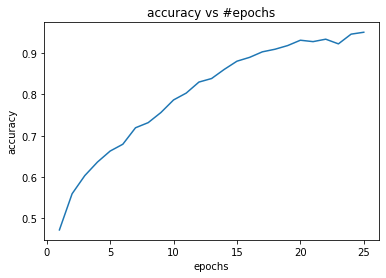

In [36]:
import matplotlib.pyplot as plt
epochs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
accuracy=[0.4721,0.5595,0.6034,0.6362,0.6628,0.6793,0.7191,0.7315,0.7559,0.7864,0.8030,0.8296,0.8382,0.8603,0.8801,0.8894,0.9027,0.9090,0.9179,0.9308,0.9274,0.9333,0.9220,0.9455,0.9501]
plt.title('accuracy vs #epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(epochs,accuracy)
plt.show()

In [37]:
new_model= tf.keras.models.load_model('Final_model_95p07.h5')

In [38]:
frame = cv2.imread("happyboy.jpg")


In [39]:
frame.shape

(225, 225, 3)

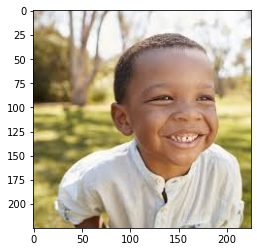

In [40]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))


In [41]:
## we need face detection algorithm (as crop background)(work on gray image)
##Haar Cascade Frontal face github
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

In [42]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) ##convert to gray image


In [43]:
gray.shape

(225, 225)

In [44]:
faces = faceCascade.detectMultiScale(gray,1.1,4) ##detect face and cropping it
for x,y,w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2) #BGR change color of rectangle
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex + ew]

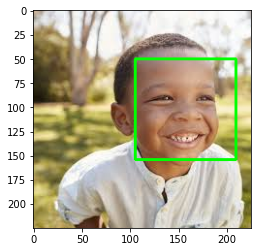

In [45]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

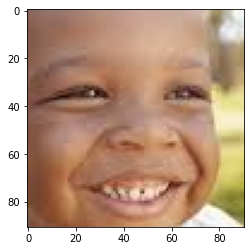

In [46]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [47]:
final_image=cv2.resize(face_roi, (224, 224)) ##resizing
final_image = np.expand_dims (final_image, axis =0) ## need fourth dimension
final_image=final_image/255.0 ## normalizing

In [48]:
Predictions =new_model.predict(final_image)

In [49]:
Predictions[0]

array([3.8497983e-11, 7.8604172e-12, 6.4147423e-11, 1.0000000e+00,
       2.1066053e-10, 1.5951293e-12, 6.1574684e-10], dtype=float32)

In [50]:
np.argmax (Predictions)

3

In [51]:
## realtime demo webcam

In [ ]:
import cv2 ### pip install opencv-python
## pip install opencv-contrib-python fullpackage
#from deepface import DeepFace ## pip install deepface

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2. FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)

# make a black image
img = np.zeros((500, 500))

# set some text
text = "Some text in a box!"

# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2. VideoCapture(1)
# Check if the webcam is opened correctly
if not cap. isOpened():
    cap = cv2.VideoCapture (0)
if not cap.isOpened():
     raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
   
    #eye_cascade = cv2.CascadeClassifier(cv2.data. haarcascades + 'haarcascade_eye.xml')
    
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #print(faceCascade. empty())
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex + ew] ## cropping the face

    final_image=cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims (final_image, axis =0) ## need fourth dimension
    final_image=final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2. FONT_HERSHEY_PLAIN
    
    if (np.argmax (Predictions) ==0):
        status = "Angry"
        
        x1, y1,w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame, status, (100, 150), font, 3,(0, 0, 255),2,cv2.LINE_4)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))
        
    elif (np.argmax(Predictions) ==1):
        status = "Disgust"
    
        x1, y1,w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
         # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
    
        cv2.rectangle(frame, (x, y),(x+w, y+h),(0,0,255))
    
    elif (np.argmax(Predictions) ==2):
        status = "Fear"
    
        x1, y1,w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
         # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
    
        cv2.rectangle(frame, (x, y),(x+w, y+h),(0,0,255))
    
    elif (np.argmax(Predictions) ==3):
        status = "Happy"
    
        x1, y1,w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
         # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
    
        cv2.rectangle(frame, (x, y),(x+w, y+h),(0,0,255))
    
    elif (np.argmax(Predictions) ==4):
        status = "Neutral"
    
        x1, y1,w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
         # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
    
        cv2.rectangle(frame, (x, y),(x+w, y+h),(0,0,255))
    
    elif (np.argmax(Predictions) ==5):
        status = "Sad"
    
        x1, y1,w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
         # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
    
        cv2.rectangle(frame, (x, y),(x+w, y+h),(0,0,255))
        
    else: 
        status = "Surprise"
    
        x1, y1,w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
         # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
    
        cv2.rectangle(frame, (x, y),(x+w, y+h),(0,255,0))
    
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade. empty ())
    #faces = faceCascade.detectMulttScale(gray,1.1,4)

    # Draw a rectangle around the faces
    #for(X, Yom, h) in faces:
     # cv2.rectongle(frane, (x, y), (xem, yeh), (8, 255, 0), 2)

          
    #Use putText() method for
    # inserting text on video

    cv2.imshow('Face Emotion Recognition',frame)
                   
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
            
        

cap.release()
cv2.destroyAllWindows()

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not d

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not d